## Project Overview

**Business Problem:**  
Which customers and customer segments generate the most revenue, and how should the company optimize marketing, retention, and product focus?

**Objective of this Notebook:**  
- Perform data cleaning and validation
- Validate SQL-based insights using Python
- Conduct exploratory data analysis (EDA)
- Ensure data quality before dashboarding

## Dataset Description

- Total records: 1000 orders
- Unique customers: 292
- Granularity: Order-level transactional data
- Time period: Based on order_date column
- Data source: E-commerce order data


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/khush/OneDrive/Desktop/Revenue_and_Customer_Risk_Analysis.csv")

## Initial Data Inspection

The dataset is inspected to understand:
- Shape and size
- Data types
- Missing values
- Potential inconsistencies across customer attributes


In [3]:
df.head()
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer ID      1000 non-null   object 
 1   Gender           1000 non-null   object 
 2   Region           950 non-null    object 
 3   Age              900 non-null    float64
 4   Product Name     1000 non-null   object 
 5   Category         1000 non-null   object 
 6   Unit Price       1000 non-null   float64
 7   Quantity         1000 non-null   int64  
 8   Total Price      1000 non-null   int64  
 9   Shipping Fee     1000 non-null   float64
 10  Shipping Status  950 non-null    object 
 11  Order Date       1000 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 93.9+ KB


## Column Standardization

To ensure consistency across Python, SQL, and BI tools:
- Column names are converted to lowercase
- Spaces are replaced with underscores
- Leading/trailing spaces are removed


In [4]:
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

In [5]:
df.columns

Index(['customer_id', 'gender', 'region', 'age', 'product_name', 'category',
       'unit_price', 'quantity', 'total_price', 'shipping_fee',
       'shipping_status', 'order_date'],
      dtype='object')

## Date Parsing & Validation

The `order_date` column is converted to datetime format to:
- Enable time-based analysis
- Ensure consistency with SQL date logic
- Detect invalid or malformed dates


In [6]:
df['order_date'] = pd.to_datetime(
    df['order_date'],
    format='%d-%m-%Y',
    errors='coerce'
)

In [7]:
df['order_date'].isna().sum()

0

## Missing Value Analysis & Data Quality Decisions

Missing values were identified in key columns such as:
- Age
- Region
- Shipping status

### Observations:
- Gender shows inconsistencies for the same customer_id
- Age is mostly consistent per customer_id where present
- Region varies across orders for some customers

### Decisions:
- Gender is excluded from customer-level insights due to inconsistency
- Age is retained for demographic explanation, not segmentation
- Missing values are not imputed to avoid introducing bias
- SQL segmentation is performed at customer level, Python used for validation


In [8]:
df.isna().sum().sort_values(ascending=False)

age                100
region              50
shipping_status     50
customer_id          0
gender               0
product_name         0
category             0
unit_price           0
quantity             0
total_price          0
shipping_fee         0
order_date           0
dtype: int64

### Missing Data Interpretation

- Age is missing for ~10% of orders.
- Region and shipping status are missing for ~5% of orders.
- Missing values appear at the order level, not customer level.

### Data Handling Decisions

- No imputation was performed to avoid introducing artificial patterns.
- Customer-level segmentation relies on transactional value and frequency, not demographic completeness.
- Demographic attributes are used only for explanatory analysis, not for defining customer value.


In [9]:
df['customer_id'].nunique()

292

## Key Metric Validation (Python vs SQL)

Key business metrics computed in SQL are validated using Python to ensure:
- Consistency of total revenue
- Correct customer counts
- Alignment of category-level revenue


In [10]:
df['total_price'].sum()

1346600

In [11]:
df.groupby('category')['total_price'].sum().sort_values(ascending=False)

category
Electronics    1200500
Wearables        74200
Accessories      71900
Name: total_price, dtype: int64

In [12]:
df.groupby('customer_id')['gender'].nunique().value_counts()

2    192
1    100
Name: gender, dtype: int64

In [13]:
df.groupby('customer_id')['age'].nunique().value_counts()

1    287
0      5
Name: age, dtype: int64

## Exploratory Data Analysis (EDA)

EDA is performed to:
- Understand order value distribution
- Identify revenue concentration
- Assess operational risk via shipping status


Text(0.5, 1.0, 'Distribution of Order Value')

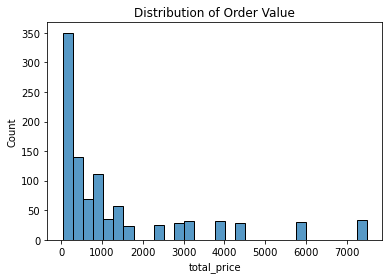

In [14]:
sns.histplot(df['total_price'], bins=30)
plt.title("Distribution of Order Value")

### Insight: Order Value Distribution

The order value distribution is highly right-skewed, indicating that:
- A majority of orders are low to mid-value
- A small proportion of high-value orders contribute disproportionately to total revenue

This pattern confirms that average-based metrics alone are insufficient to describe customer value.
As a result, customer segmentation in SQL is designed using percentile-based revenue thresholds
to accurately identify high-value customers driving overall business performance.


Text(0.5, 1.0, 'Orders by Shipping Status')

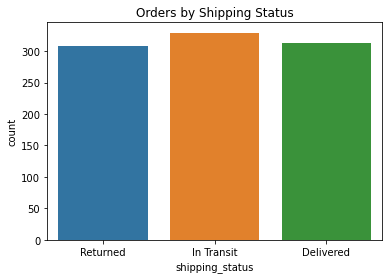

In [15]:
sns.countplot(x='shipping_status', data=df)
plt.title("Orders by Shipping Status")

### Insight: Shipping Status Distribution

Orders are fairly evenly distributed across Delivered, In Transit, and Returned statuses,
with a significant number of returned orders observed.

This highlights potential revenue leakage and operational risk, emphasizing the need to:
- Analyze return rates by product and customer segment
- Identify high-return products that may require quality or logistics intervention

These observations directly inform the operational analysis conducted in Phase 5 of the SQL workflow.


In [16]:
df.to_csv("cleaned_orders.csv", index=False)

## Summary & Next Steps

- Data quality issues were identified and addressed
- Python validation confirms SQL-based segmentation logic
- Cleaned dataset exported for Excel pivot analysis and Power BI dashboarding

**Next Steps:**
- Excel: KPI summaries and pivot tables
- Power BI: Interactive dashboard for stakeholders
